# Non-LTI Systems

## Volterra Series:

- https://www.youtube.com/watch?v=sTN9FGFJ0Yw

- http://s3am.ircam.fr/wp-content/uploads/2015/10/DAFx_Tutorial_Helie.pdf

- https://github.com/d-bouvier/pyvi

## System Identification
- http://sysidentpy.org/index.html

## Dynamic Systems
- https://www.youtube.com/watch?v=2VBN_dJZLWc


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [131]:
from warnings import simplefilter
simplefilter("ignore", FutureWarning)

from sysidentpy.utils.generate_data import get_miso_data, get_siso_data

from sysidentpy.model_structure_selection import FROLS, MetaMSS
from sysidentpy.basis_function import Polynomial, Fourier
from sysidentpy.utils.display_results import results
from sysidentpy.metrics import root_relative_squared_error
import pandas as pd

from sktime.forecasting.model_selection import temporal_train_test_split

# Generate Test input Signal $u(n)$

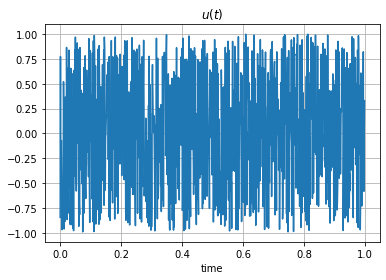

In [2]:
N = 1000
u = random.random(N)*2-1
n = arange(N)
sr = 1000
t = n/sr
plot(t,u)
title('$u(t)$')
xlabel('time')
grid(True)

# Generate Non-LTI System

In [96]:
def f(x):
    y = zeros_like(x)
    for n in range(len(x)):
        y[n] = x[n-1]+x[n-1]**2*0.1 + y[n-1]*0.9
    return y

In [152]:
def f(x):
    y = zeros_like(x)
    for n in range(len(x)):
        y[n] = x[n-1]+x[n-2]*0.9
    y = tanh(y*1.5)
    return y

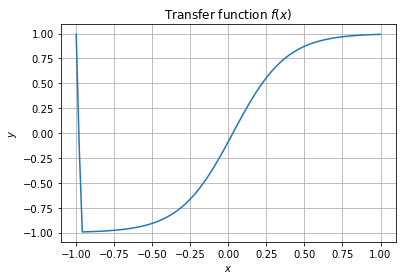

In [153]:
x = linspace(-1,1,100)
y = f(x)
plot(x,y)
grid(True)
title('Transfer function $f(x)$')
xlabel('$x$')
ylabel('$y$')
show()

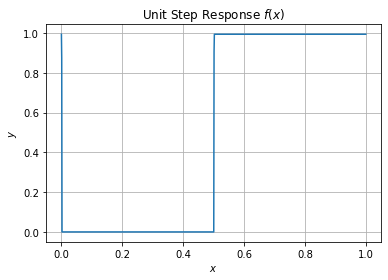

In [154]:
x = zeros(N)
x[N//2:]=1
y = f(x)
plot(t,y)
grid(True)
title('Unit Step Response $f(x)$')
xlabel('$x$')
ylabel('$y$')
show()

## Plot input $u(n)$ vs output $y(n)$

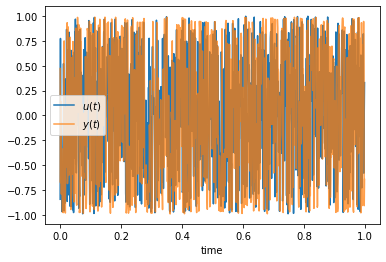

In [155]:
y = f(u)
plot(t,u, label='$u(t)$')
plot(t,y, label='$y(t)$', alpha=0.75)
xlabel('time')
legend()
show()

## Train/Test Split

In [156]:
testSize = 50
x_data = np.array([u]).T
y_data = np.array([y]).T
y_train, y_test, x_train, x_test = temporal_train_test_split(y_data, x_data, test_size=testSize)

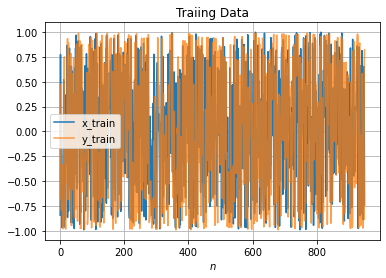

In [157]:
plot(x_train, label='x_train')
plot(y_train, label='y_train', alpha=0.75)
title('Traiing Data')
grid(True)
xlabel('$n$')
legend()
show()

## Fit the model

Error: 0.2371012913428255


,Regressors,Parameters,ERR
0,x1(k-1),8.7901E-01,5.07440845E-01
1,x1(k-2),7.6753E-01,4.30398128E-01
2,x1(k-3)^2,-2.2865E-01,4.02913001E-04
3,y(k-1)^2,-1.5923E-01,3.01514236E-04
4,x1(k-2)y(k-3),1.5451E-02,1.19185769E-04
5,x1(k-1)y(k-2),6.8856E-02,9.07874794E-05
6,x1(k-3)x1(k-1),-1.0470E-02,1.39324346E-04
7,x1(k-1)y(k-3),-2.7896E-02,8.50826727E-05
8,y(k-3),-1.5452E-02,7.51564768E-05
9,y(k-3)^2,1.3984E-02,8.00853836E-05


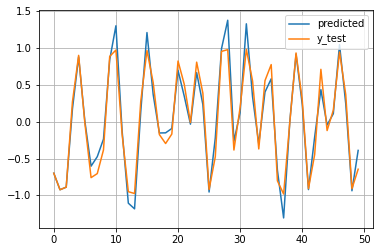

In [164]:
basis_function = Polynomial(degree=2)
# basis_function = Fourier(degree=2, n=2, p=2*np.pi, ensemble=True)
model = FROLS(
    basis_function=basis_function,
    order_selection=False,
    n_info_values=70,
    n_terms = 25,
    extended_least_squares=False,
    ylag=3, xlag=3,
    info_criteria='aic',
    estimator='least_squares',
)


model.fit(X=x_train, y=y_train)

prediction = model.predict(x_test, y_test,steps_ahead=None)
rrse = root_relative_squared_error(y_test, prediction)
print(f'Error: {rrse}')


plot(prediction, label='predicted')
plot(y_test, label='y_test')
legend()
grid(True)

res = results(
    model.final_model, model.theta, model.err,
    model.n_terms, err_precision=8, dtype='sci'
    ),


pd.DataFrame(data=res[0],columns=['Regressors', 'Parameters', 'ERR'])


## Volterra Series
- https://github.com/d-bouvier/pyvi

In [ ]:
import sys
sys.path.append('../pyvi')
import pyvi

kernels = pyvi.identification.direct_method(u,y,3,M=3)

kernels

In [41]:
y_test

array([[ 0.60459584],
       [-0.54911539],
       [-0.11672578],
       [-0.23552053],
       [-0.35681954],
       [ 0.64170222],
       [ 0.29191244],
       [-0.81109857],
       [ 0.52594563],
       [ 0.75278845]])

In [ ]:
xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')
grid()

In [ ]:


# model = PolynomialNarmax(non_degree=1,
#                          order_selection=True,
#                          n_info_values=10,
#                          extended_least_squares=False,
#                          ylag=1, xlag=1,
#                          info_criteria='aic',
#                          estimator='least_squares',
#                          )

basis_function = Polynomial(degree=2)
model = MetaMSS(
    basis_function=basis_function,
    # order_selection=True,
    # n_info_values=10,
    extended_least_squares=False,
    ylag=4, xlag=4,
    # info_criteria='aic',
    estimator='least_squares',
)


model.fit(X_train=x_train, y_train=y_train,y_test=y_test,X_test=x_test)

prediction = model.predict(X_test=x_test, y_test=y_test)
rrse = root_relative_squared_error(y_test, prediction)
print(f'Error: {rrse}')


plot(prediction, label='predicted')
plot(y_test, label='y_test')
legend()
grid(True)

res = results(
    model.final_model, model.theta, model.err,
    model.n_terms, err_precision=8, dtype='sci'
    ),


pd.DataFrame(data=res[0],columns=['Regressors', 'Parameters', 'ERR'])


In [ ]:
res

In [ ]:
model.final_model

In [ ]:
model.theta

In [ ]:
model.

In [ ]:
pd.DataFrame(data=model.final_model)

In [ ]:
from sysidentpy.polynomial_basis import PolynomialNarmax
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_miso_data, get_siso_data
x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.001,
                                                   train_percentage=90)
model = PolynomialNarmax(non_degree=2,
                         order_selection=True,
                         n_info_values=10,
                         extended_least_squares=False,
                         ylag=2, xlag=2,
                         info_criteria='aic',
                         estimator='least_squares',
                         )
model.fit(x_train, y_train)
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)
ee, ex, extras, lam = model.residuals(x_valid, y_valid, yhat)
model.plot_result(y_valid, yhat, ee, ex)